# Assignment 0: Conical tank emptying time

Let's calculate how long it takes to [empty a conical tank](https://www.youtube.com/watch?v=2jQ1jA8uJuU)

The simplification of the continuity equation leads, for a generic $h$, to

$$
u_1 D_h^2 = u_1 \left(d + 2h \tan \theta \right)^2 = u_2 d^2 \tag{1}
$$

$$
\Rightarrow \; u_2 = u_1\left(1 + 2\frac{h}{d} \tan \theta \right)^2 \tag{2}
$$

On the other hand, Bernoulli's equation, considering quasi-steady flow and without viscosity,

$$
u_1^2 + 2gh = u_2^2 = u_1^2 \left(1 + 2\frac{h}{d} \tan \theta \right)^4 \tag{3}
$$

$$
\Rightarrow \; u_1^2 \left[ \left(1 + 2\frac{h}{d} \tan \theta \right)^4 -1 \right] = 2gh \tag{4}
$$

$$
\Rightarrow \; u_1 = \left[ \frac{2gh}{\left(1 + 2\frac{h}{d} \tan \theta \right)^4 -1} \right]^\frac{1}{2} = -\frac{\textrm{d} h}{\textrm{d} t} \tag{5}
$$

$$
\Rightarrow \; \boxed{dt = - \left[ \frac{\left(1 + 2\frac{h}{d} \tan \theta \right)^4 -1}{2gh}\right]^\frac{1} {2} \textrm{d} h}  \tag{6} %\label{eq:int}
$$

This can be written dimensionless with a time characteristic $\tau = \sqrt{\frac{d}{2g}}$, a change to dimensionless variable $\xi = \frac{h}{d}$, and a parameter $A = 2\tan \theta$, becoming

$$
\frac{\textrm{d} t}{\tau} = - \left[ \frac{\left(1 + A \xi \right)^4 -1}{\xi}\right]^\frac{1 }{2} \textrm{d} \xi \tag{7}
$$

Use sympy to analytically compute this time, making an estimation with  $d \ll h$ so that it can be supposed that  $\xi \gg 1$.

---------------------------------------------------------------------------------------------------------------
# GROUP 1 SOLUTION:

---------------------------------------------------------------------------------------------------------------

## 0. Importing sympy:

In [140]:
%reset -f
import sympy as sp

The equation can be written to solve the EDO by integration, to determine the $t_f$ to empty the conical tank:
    
$$ 
dt = - \tau \left[ \dfrac{(1+A \xi)^4-1}{\xi}  \right]^{\frac{1}{2}} d \xi \;\;\; \to \;\;\; \int_{0}^{t_f} dt = \int_{\xi_0}^{\xi_f} - \tau \left[ \dfrac{(1+A \xi)^4-1}{\xi}  \right]^{\frac{1}{2}} d \xi \;\;\; \to \;\;\; t_f = \int_{\xi_0}^{\xi_f} - \tau \left[ \dfrac{(1+A \xi)^4-1}{\xi}  \right]^{\frac{1}{2}} d \xi
$$

Considering that $ \xi \gg 1 $, then $(1+A \xi)^4-1 \sim (1+A \xi)^4$ for a simplified solution:

$$
t_f=\int_{\xi_0}^{\xi_f} - \tau \left[ \dfrac{(1+A \xi)^4}{\xi}  \right]^{\frac{1}{2}} d \xi =- \tau \int_{\xi_0}^{\xi_f}  \left[ \dfrac{(1+A \xi)^2}{\sqrt{\xi}}  \right] d \xi
$$

## 1. Declaring variables with sympy (limitating to positive and real values):

In [141]:
tau,xi,A,xi_0,xi_f=sp.symbols('tau,xi,A,xi_0,xi_f', positive=True, real=True)

## 2. Defining the right hand side of the expression to integrate $rhs$ as:

$$
rhs=\left[ \dfrac{(1+A \xi)^2}{\sqrt{\xi}}  \right]
$$

So that $t_f$:

$$
t_f=-\tau \int_{\xi_0}^{\xi_f} rhs \; d\xi
$$

In [142]:
rhs=sp.sqrt(((1+A*xi)**4)/(xi))
display(rhs)

(A*xi + 1)**2/sqrt(xi)

## 3. The indefinite integral for $t_f$:

In [143]:
indef_solution=rhs.integrate(xi)*(-tau)
indef_solution.simplify()
display(indef_solution)

-tau*(2*A**2*xi**(5/2)/5 + 4*A*xi**(3/2)/3 + 2*sqrt(xi))

## 4. The definite integral for $t_f$:

In [144]:
def_solution=rhs.integrate((xi,xi_0,xi_f))*(-tau)
display(def_solution)

-tau*(-2*A**2*xi_0**(5/2)/5 + 2*A**2*xi_f**(5/2)/5 - 4*A*xi_0**(3/2)/3 + 4*A*xi_f**(3/2)/3 - 2*sqrt(xi_0) + 2*sqrt(xi_f))

For $t_{empty}$ (time to empty a conical tank), $\xi_f=0$, and the equation:

In [145]:
t_empty=sp.symbols('t_{empty}',positive=True,real=True)  # new symbol
tSolution = sp.Eq(t_empty,def_solution)                # create equation
tSolution = tSolution.replace(xi_f,0)                       # condition for empty tank at final time
tSolution = tSolution.simplify()                            # simplify expression
display(tSolution)

Eq(t_{empty}, 2*tau*sqrt(xi_0)*(3*A**2*xi_0**2 + 10*A*xi_0 + 15)/15)

Finally, replacing the parameters $\tau = \sqrt{\frac{d}{2g}}$, $\xi_i = \frac{h_i}{d}$ and $A = 2\tan{\theta}$, the final analytical expression for the time is obtained:

In [146]:
thetaS,dS,gS,hiS = sp.symbols('theta,d,g,h_i',positive=True,real=True) # new symbols "S"
tSolution = tSolution.replace(tau,sp.sqrt(dS/(2*gS)))
tSolution = tSolution.replace(xi_0,hiS/dS)
tSolution = tSolution.replace(A,2*sp.tan(thetaS))
display(tSolution)

Eq(t_{empty}, sqrt(2)*sqrt(h_i)*(15 + 20*h_i*tan(theta)/d + 12*h_i**2*tan(theta)**2/d**2)/(15*sqrt(g)))

## 5. Subsituting numerical values for a real solution:

$$
\tau = \sqrt{\frac{d}{2g}}
$$

$$
\xi = \frac{h}{d}
$$

$$
A = 2 \; tan \theta
$$

For a cone of 1m of height, an angle of 15º and a bottom hole of 3cm of diameter, the next data can be defined: $h_i = 1\:m$, $\theta = 15º$, $d = 3\:cm = 0.03\:m$ and $g = 9.81\:m/s^2$.

Replacing these values in the last expression, the time it takes to empty the cone is (in seconds):

In [147]:
import numpy as np

# NUMERICAL VALUES:
g = 9.81                    # gravity [m/s2]
h0 = 1                      # height initial [m]
hf = 0                      # height final [m] -> 0 for empty tank
d = 0.03                    # [m]
theta = 15 * np.pi / 180    # conical slope [rad]

# "tau" CHARACTERISTIC, "xi" NON DIMENSIONAL, "A" PARAMETER:
xi_0_par = h0/d             # initial tank [-]
xi_f_par = hf/d             # empty tank [-]
tau_par = np.sqrt(d/(2*g))  # characteristic time [s]
A_par = 2 * np.tan(theta)   # [-]

num_solution = sp.lambdify((xi_0,xi_f,A,tau),def_solution)
num_solution(xi_0_par,xi_f_par,A_par,tau_par)

34.644597974586205

## 6. Unsimplified solution:

$$
t_f = - \tau \int_{\xi_0}^{\xi_f}  \left[ \dfrac{(1+A \xi)^4-1}{\xi}  \right]^{\frac{1}{2}} d \xi
$$

Considering $rhsA$ as:

$$
rhsA = \left[ \dfrac{(1+A \xi)^4-1}{\xi}  \right]^{\frac{1}{2}}
$$

And the solution:

$$
t_f = - \tau \int_{\xi_0}^{\xi_f}  rhsA \; d \xi
$$

In [148]:
rhsA=sp.sqrt(((1+A*xi)**4-1)/(xi))
display(rhsA)

sqrt((A*xi + 1)**4 - 1)/sqrt(xi)

In [149]:
def_solutionA=rhsA.integrate((xi,xi_0,xi_f))*(-tau)
display(def_solutionA)

-sqrt(A)*tau*Integral(sqrt(A*xi + 2)*sqrt(A**2*xi**2 + 2*A*xi + 2), (xi, xi_0, xi_f))

In [150]:
import numpy as np

# NUMERICAL VALUES AND PARAMETERS ALREADY DEFINED FOR SIMPLIFIED SOLUTION
# *** If compilation fails, install scipy library (pip install scipy)***

num_solutionA = sp.lambdify((xi_0,xi_f,A,tau),def_solutionA)
num_solutionA(xi_0_par,xi_f_par,A_par,tau_par)

34.591526353823404

The error between the approximated solution and the exact is:

In [151]:
error=(num_solutionA(xi_0_par,xi_f_par,A_par,tau_par)-num_solution(xi_0_par,xi_f_par,A_par,tau_par))/num_solutionA(xi_0_par,xi_f_par,A_par,tau_par)
error=error*100
print('Simplified solution has an error of {0} %.'.format(error))

Simplified solution has an error of -0.15342376112563286 %.


## 7. PLOTTING PROGRESSION OF ERROR AS A FUNCTION OF $\xi_0$

Doing calculations for a number of $\xi$:

In [152]:
# NUMERICAL VALUES:
g = 9.81                    # gravity [m/s2]
hf = 0                      # height final [m] -> 0 for empty tank
d = 0.03                    # [m]
theta = 15 * np.pi / 180    # conical slope [rad]

h0_Array = np.arange(d,d*100,0.03) # height initial, from (0.03,3.0) [m]

# "tau" CHARACTERISTIC, "xi" NON DIMENSIONAL, "A" PARAMETER:
xi_0_Array = h0_Array*(1/d) # initial tank [-]
xi_f_par = hf/d # empty tank [-]
tau_par = np.sqrt(d/(2*g)) # [s]
A_par = 2 * np.tan(theta) # [-]

# Initializing lists
error_Array=[]
for xi_0_par in xi_0_Array:
    sim_sol=num_solution(xi_0_par,xi_f_par,A_par,tau_par)
    abs_sol=num_solutionA(xi_0_par,xi_f_par,A_par,tau_par)
    error_Array.append(np.abs((sim_sol-abs_sol)/abs_sol))    


Importing matplolib and plotting:

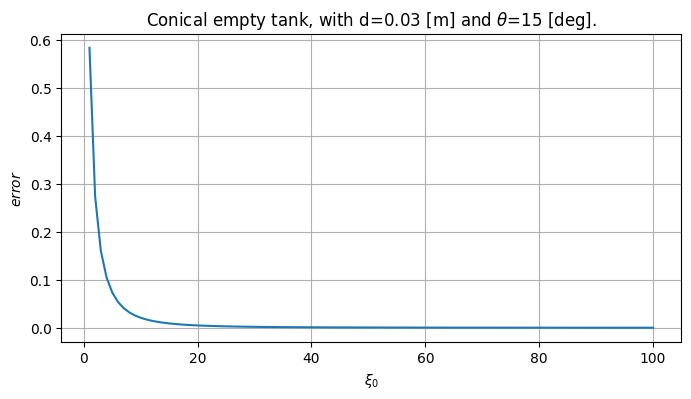

In [153]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(xi_0_Array,error_Array)
ax.set_xlabel(r'$\xi_0$')
ax.set_ylabel(r'$error$')
ax.set_title(r'Conical empty tank, with d={0} [m] and $\theta$={1} [deg].'.format(d,round(theta*180/np.pi)))
ax.grid(which='major',axis='both')

As it can be seen, the error is lowered if $\xi_0$ is higher, as the hypothesis $\xi \gg 1$ is respected. 

The first and last values for the error plot:

In [154]:
from IPython.display import display, Math
display(Math(r'\xi_0={0} \;\;\; \to \;\;\; error={1}.'.format(xi_0_Array[0],error_Array[0])))
display(Math(r'\xi_0={0} \;\;\; \to \;\;\; error={1}.'.format(xi_0_Array[-1],error_Array[-1])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

On a logarithmic axis, the plot:

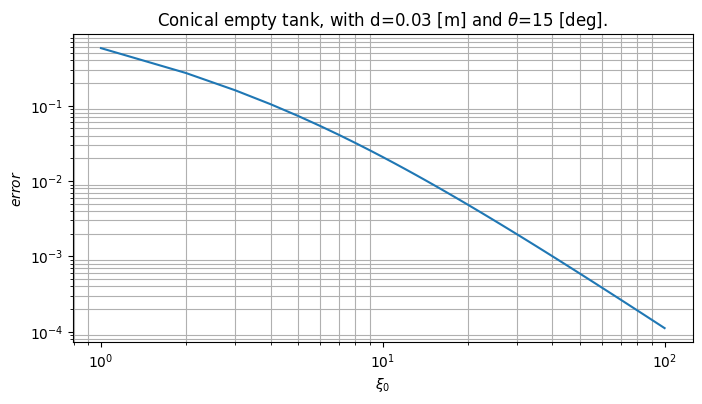

In [155]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(xi_0_Array,error_Array)
ax.set_xlabel(r'$\xi_0$')
ax.set_ylabel(r'$error$')
ax.set_title(r'Conical empty tank, with d={0} [m] and $\theta$={1} [deg].'.format(d,round(theta*180/np.pi)))
ax.grid(which='minor',axis='both')

ax.set_xscale('log')
ax.set_yscale('log')

In [156]:
try:
    %load_ext watermark
except:
    !pip install watermark
%watermark -v -m -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.6.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit

matplotlib: 3.6.2
numpy     : 1.23.4
sympy     : 1.7.1

